<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/Simul2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte I: distribución exponencial

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

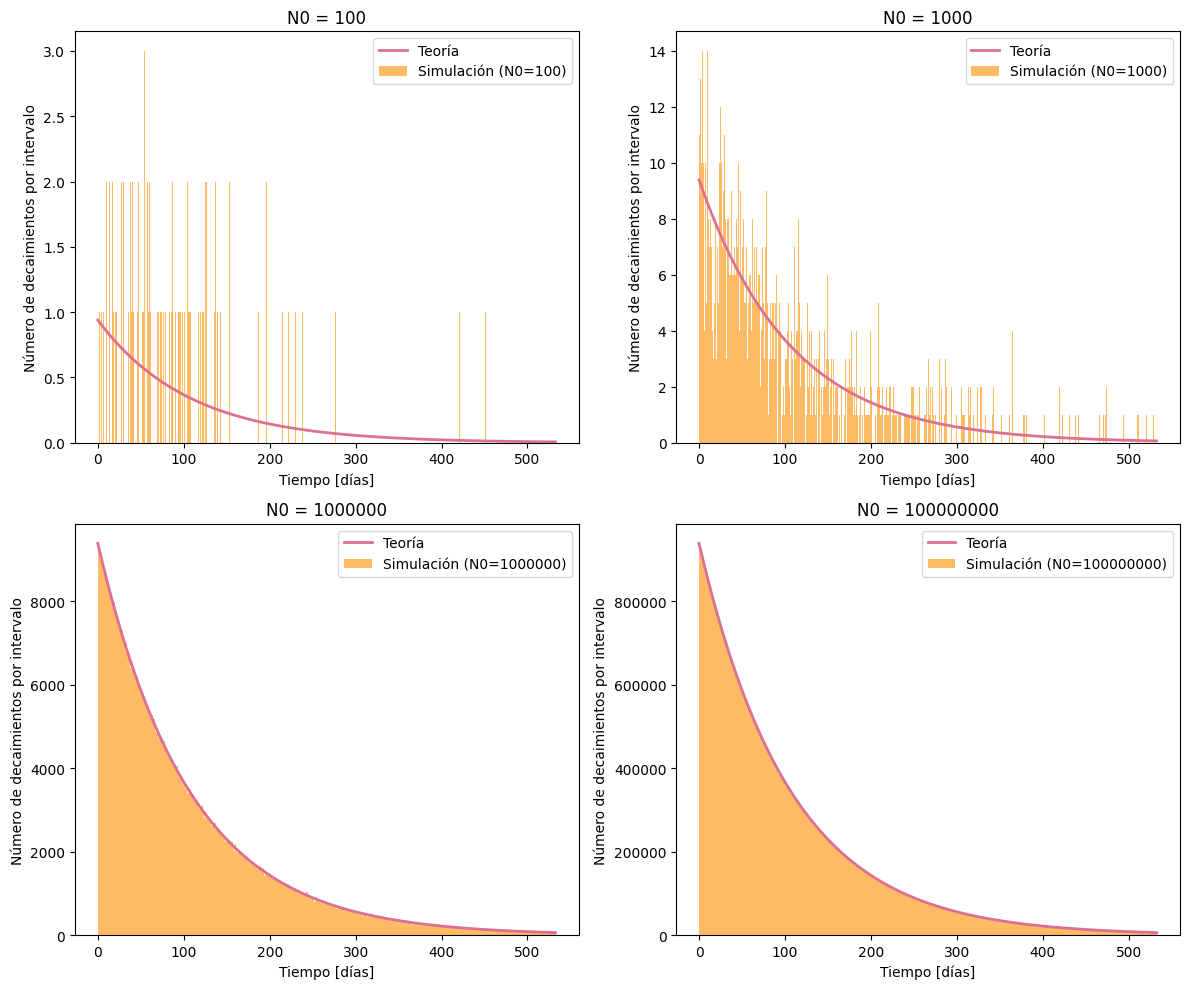

In [18]:
T_med = 73.826            # Semivida [días]
Gamma = np.log(2)/T_med   # probabilidad de decaimiento por día [1/días]
tau = 1/Gamma             # Vida media [días]

np.random.seed(123)       # semilla para recrear el comportamiento

dt = 1                    # La toma de datos ocurre en este tiempo, dt debe ser suficientemente menor para que se tome una buena cantidad de datos. Un día comparado con el tau es bueno.
t_f = 5*tau               # después de unas pocas vidas medias (tau), casi todos los núcleos han decaído. En este sentido, se puede considerar alrededor de 4 veces tau.


N_values = [10**2, 10**3, 10**6, 10**8]               # para el punto 7, distinta cantidad de núcleos


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, N0 in enumerate(N_values):
    u = np.random.rand(N0)                             # Monte Carlo para números aleatorios
    t_decay = -np.log(1-u)/Gamma                       # inversa de la acumulativa para pbtener los tiempos de decaimiento


    bins = np.arange(0, t_f+dt, dt)                    # abarca hasta el último bin
    counts, edges = np.histogram(t_decay, bins=bins)   # cuento cuántos núcleos decayeron en cada intervalo
    centers = 0.5 * (edges[1:] + edges[:-1])           # calcular los centros de los bins para graficar


    t_theory = np.linspace(0, t_f, 100)
    pdf_theory = N0*Gamma * np.exp(-Gamma * t_theory)  # densidad de probabilidad teórica escalada a los datos



    ax = axes[idx]
    ax.bar(centers, counts, width=dt,color='darkorange', alpha=0.6, label="Simulación (N0={})".format(N0))   # se usa dt como ancho del bin
    ax.plot(t_theory, pdf_theory, color='palevioletred', lw=2, label="Teoría")
    ax.set_xlabel("Tiempo [días]")
    ax.set_ylabel("Número de decaimientos por intervalo")
    ax.set_title(f"N0 = {N0}")
    ax.legend()

plt.tight_layout()
plt.show()

#Parte II: distribución binomial núcleo por núcleo

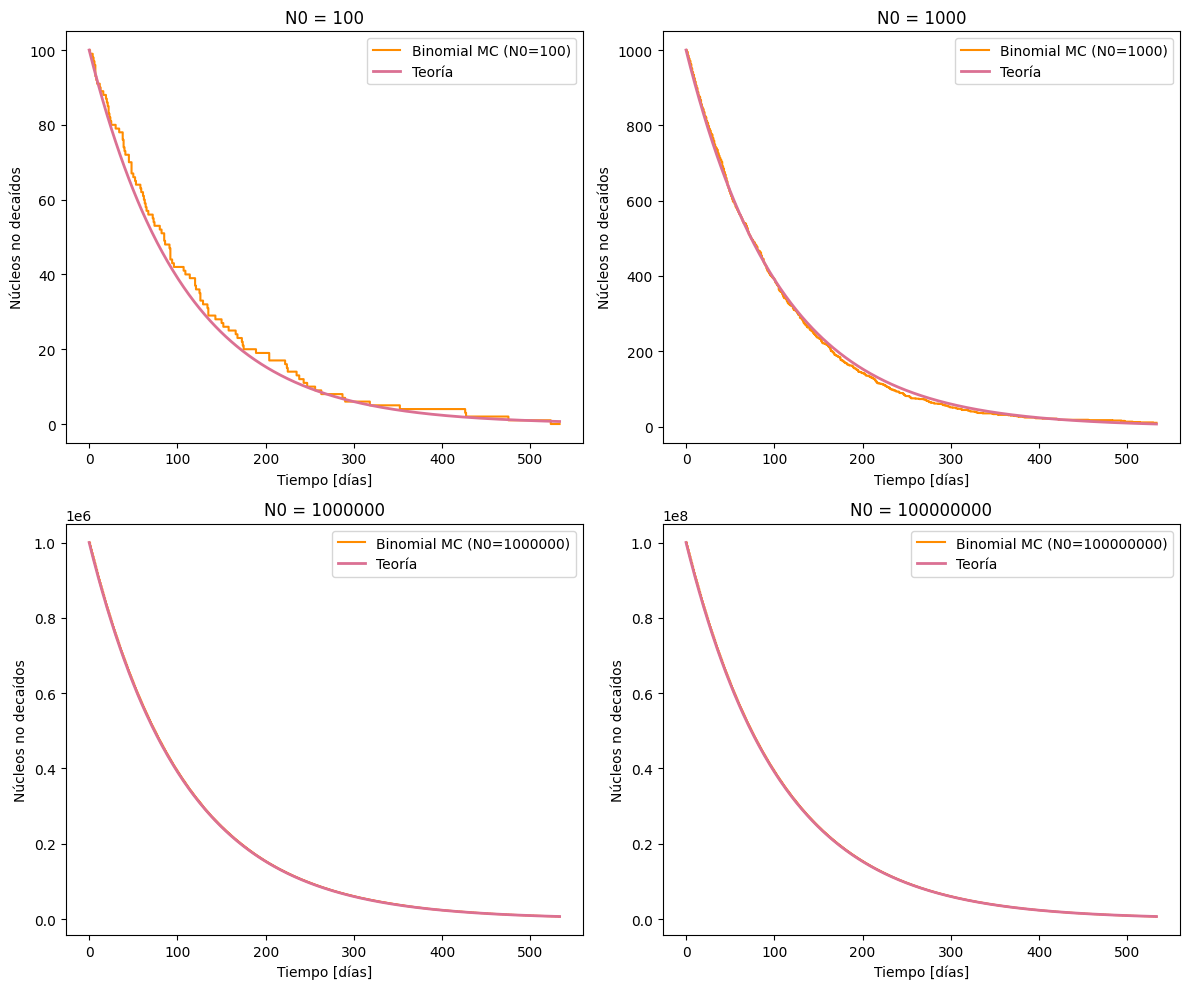

In [19]:
T_med = 73.826            # semivida [días]
Gamma = np.log(2)/T_med   # probabilidad de decaimiento por día [1/días]
tau = 1/Gamma             # vida media [días]
np.random.seed(123)

dt = 1                    # intervalo de tiempo [días]
t_f = 5*tau               # tiempo total simulado

N_values = [10**2, 10**3, 10**6, 10**8]
t_points = np.arange(0, t_f+dt, dt)      # discretización
p = 1 - np.exp(-Gamma*dt)                # probabilidad de decaer en un paso dt (lo que vemos en el punto 9.)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, N0 in enumerate(N_values):      # recorro cada cantidad de núcleos del arreglo N_values
    N_t = [N0]                           # lista para guardar núcleos vivos (que no decaen), que necesito volver a examinar en t_{i+1}
    N_alive = N0

    for t in t_points[1:]:                          # para cada paso de tiempo
        decays = np.random.binomial(N_alive, p)     # aquí se toma la decisión de cuántos núcleos decaen de los disponibles (N_alive) con prob p
        N_alive -= decays                           # le voy restando a los núcleos vivos, cada vez quedan menos por decaer
        N_t.append(N_alive)                         # guardo la lista de los vivos que quedan


    N_theory = N0 * np.exp(-Gamma * t_points)       # número de núcleos teórica


    ax = axes[idx]
    ax.plot(t_points, N_t, drawstyle="steps-post",
            label=f"Binomial MC (N0={N0})", color="darkorange")
    ax.plot(t_points, N_theory, color="palevioletred", lw=2, label="Teoría")
    ax.set_xlabel("Tiempo [días]")
    ax.set_ylabel("Núcleos no decaídos")
    ax.set_title(f"N0 = {N0}")
    ax.legend()

plt.tight_layout()
plt.show()


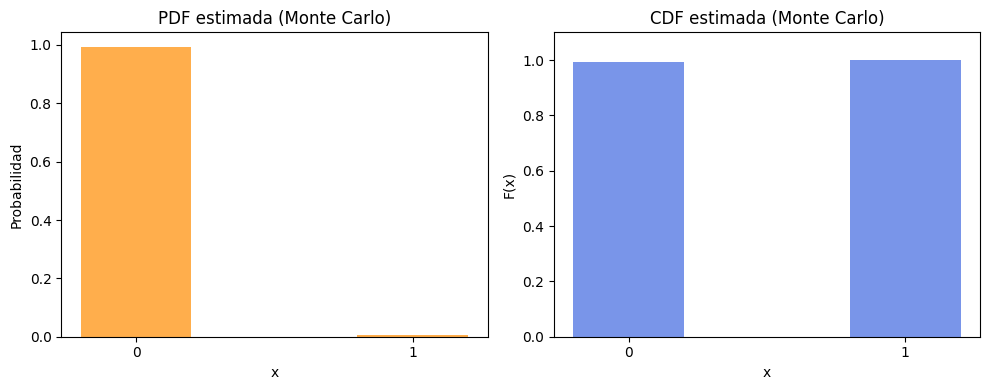

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del núcleo
T_med = 73.826
Gamma = np.log(2)/T_med
dt = 1.0

# Probabilidad de decaer en Δt
p = 1 - np.exp(-Gamma*dt)

# Número de simulaciones Monte Carlo
M = 10000

# Simular N=1 intento muchas veces
# devuelve array de 0 (no decae) o 1 (decae)
samples = np.random.binomial(1, p, size=M)

# Calcular frecuencias relativas
counts, edges = np.histogram(samples, bins=[-0.5,0.5,1.5], density=True)
# CDF: acumulamos
cdf = np.cumsum(counts) / np.sum(counts)

# Graficar PDF (frecuencias) y CDF (acumulativa)
fig, ax = plt.subplots(1,2, figsize=(10,4))

# PDF
ax[0].bar([0,1], counts, width=0.4, color="darkorange", alpha=0.7)
ax[0].set_xticks([0,1])
ax[0].set_xlabel("x")
ax[0].set_ylabel("Probabilidad")
ax[0].set_title("PDF estimada (Monte Carlo)")

# CDF
ax[1].bar([0,1], cdf, width=0.4, color="royalblue", alpha=0.7)
ax[1].set_xticks([0,1])
ax[1].set_xlabel("x")
ax[1].set_ylabel("F(x)")
ax[1].set_title("CDF estimada (Monte Carlo)")
ax[1].set_ylim(0,1.1)

plt.tight_layout()
plt.show()
